# Data preprocessing

Running the wrapper.py code parses the dblp.xml file and produces two text files (tab separated) 

fieldFile.txt
pubFile.txt

Let's import them in python and have a look at the data


In [1]:
import pandas as pd

df = pd.read_csv('fieldFile.txt',sep = '\t',header = None)

The file contains the author, title, pages, year, volumne, journal, number, url etc for every publication

The objective is to use the title field for every author and use that to extract the most relevant topics for each and every author

In [2]:
df.columns = ['path','sno','info','desc']

df

,path,sno,info,desc
0,journals/acta/Saxena96,0,author,Sanjeev Saxena
1,journals/acta/Saxena96,1,title,Parallel Integer Sorting and Simulation Amongs...
2,journals/acta/Saxena96,2,pages,607-619
3,journals/acta/Saxena96,3,year,1996
4,journals/acta/Saxena96,4,volume,33
5,journals/acta/Saxena96,5,journal,Acta Inf.
6,journals/acta/Saxena96,6,number,7
7,journals/acta/Saxena96,7,url,db/journals/acta/acta33.html#Saxena96
8,journals/acta/Saxena96,8,ee,https://doi.org/10.1007/BF03036466
9,journals/acta/Simon83,0,author,Hans Ulrich Simon


Removing all the additional info as we are just concerned with the author and the title

In [3]:
df_n = df.loc[df['info'].isin(["author","title"])] 

print df_n.shape

(20243416, 4)


In [5]:
df_n.drop_duplicates(inplace = True)

/root/anaconda2/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [8]:
df_n = df_n[df_n.desc != ""]

print df_n.shape

(20243416, 4)


We will transpose this data to get the information for every publication at a single row level

This will make it easier to aggregate the data for multiple authors

In [9]:
df_smp = df_n.groupby(['path','info'])['desc'].max().unstack()

In [10]:
df_smp.head()

info,author,title
path,,
books/acm/0082477,Marc Rettig,The no-nonsense guide to computing careers.
books/acm/Kim95,None,"Modern Database Systems: The Object Model, Int..."
books/acm/kim95/AnnevelinkACFHK95,William Kent,Object SQL - A Language for the Design and Imp...
books/acm/kim95/Blakeley95,José A. Blakeley,OQL[C++]: Extending C++ with an Object Query C...
books/acm/kim95/BreitbartGS95,Yuri Breitbart,Transaction Management in Multidatabase Systems.


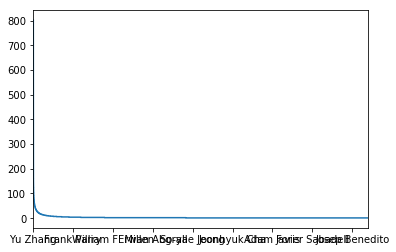

In [11]:
import matplotlib 
%matplotlib inline

df_smp.author.value_counts().plot()

Plot shows that most of the authors only have one publication 

We have around 6.2M articles 

In [12]:
print df_smp.shape

df_smp = df_smp[df_smp['title']!='']

print df_smp.shape

(6208273, 2)
(6208273, 2)


Aggregating the data for different authors 

In [13]:
df_grp = df_smp.groupby('author').agg({'title':lambda x:' '.join(x)
                        })

In [17]:
print df_grp.shape

df_grp = df_grp[df_grp['title']!="Home Page"]

print df_grp.shape

(2100227, 1)
(963639, 1)


Among the 2M authors, around 1M have title name = Home Page

Removing those gives us around 963K authors

In [18]:
#Converting the title to lowwecase

df_grp['title'] = df_grp.title.str.lower()

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


We need to write a function that would remove all the special characters/stop words (like and, to, of etc.), 
tokenize and lemmatize the data 

Lemmatizer is preferred over Stemmer as it retains the context and rules of grammar while Stemmer uses more of a brute force approach

Also removing some specific keywords like home, page, method, based which don't provide anything insightful 


In [137]:
import re as re
import nltk
from nltk.stem.porter import *
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import wordnet
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download("stopwords")
nltk.download("wordnet")
toker = TreebankWordTokenizer()

lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")


def text_preprocessor(x):

    text = str(x)
    tmp = re.sub(r'[^a-zA-Z]', ' ', text)
    x_cleaned = tmp.replace('/', ' ').replace('-', ' ').replace('"', '')
#    stop_words = ['aaa','aa','abc','abcd','aai','aac','ab','aba']
    stops = stopwords.words("english") 
    
    tokens = toker.tokenize(x_cleaned)
    meaningful_words = [w for w in tokens if w not in [stops,'l','m','aaa','aa','abc','abcd','aai','ab','aba','aac','in',"a", 
                                                       "about", "above", "above", "across", "after", "afterwards", 
                                                       "again", "against", "all", "almost", "alone", "along", 
                                                       "already", "also","although","always","am","among", 
                                                       "amongst", "amoungst", "amount",  "an", "and", "another", 
                                                       "any","anyhow","anyone","anything","anyway", "anywhere", 
                                                       "are", "around", "as",  "at", "back","be","became", "because",
                                                       "become","becomes", "becoming", "been", "before", "beforehand",
                                                       "behind", "being", "below", "beside", "besides", "between", 
                                                       "beyond", "bill", "both", "bottom","but", "by", "call", "can",
                                                       "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de",
                                                       "describe", "detail", "do", "done", "down", "due", "during", 
                                                       "each", "eg", "eight", "either", "eleven","else", "elsewhere",
                                                       "empty", "enough", "etc", "even", "ever", "every", "everyone",
                                                       "everything", "everywhere", "except", "few", "fifteen",
                                                       "fify", "fill", "find", "fire", "first", "five", "for",
                                                       "former", "formerly", "forty", "found", "four", "from", 
                                                       "front", "full", "further", "get", "give", "go", "had", 
                                                       "has", "hasnt", "have", "he", "hence", "her", "here", 
                                                       "hereafter", "hereby", "herein", "hereupon", "hers", 
                                                       "herself", "him", "himself", "his", "how", "however", 
                                                       "hundred", "ie", "if", "in", "inc", "indeed", "interest", 
                                                       "into", "is", "it", "its", "itself", "keep", "last", "latter",
                                                       "latterly", "least", "less", "ltd", "made", "many", "may", 
                                                       "me", "meanwhile", "might", "mill", "mine", "more", "moreover",
                                                       "most", "mostly", "move", "much", "must", "my", "myself", 
                                                       "name", "namely", "neither", "never", "nevertheless", "next", 
                                                       "nine", "no", "nobody", "none", "noone", "nor", "not", 
                                                       "nothing", "now", "nowhere", "of", "off", "often", "on", 
                                                       "once", "one", "only", "onto", "or", "other", "others", 
                                                       "otherwise", "our", "ours", "ourselves", "out", "over", "own",
                                                       "part", "per", "perhaps", "please", "put", "rather", "re", 
                                                       "same", "see", "seem", "seemed", "seeming", "seems", "serious",
                                                       "several", "she", "should", "show", "side", "since", "sincere",
                                                       "six", "sixty", "so", "some", "somehow", "someone", "something",
                                                       "sometime", "sometimes", "somewhere", "still", "such", "system",
                                                       "take", "ten", "than", "that", "the", "their", "them", 
                                                       "themselves", "then", "thence", "there", "thereafter", 
                                                       "thereby", "therefore", "therein", "thereupon", "these", 
                                                       "they", "thickv", "thin", "third", "this", "those", "though", 
                                                       "three", "through", "throughout", "thru", "thus", "to", 
                                                       "together", "too", "top", "toward", "towards", "twelve", 
                                                       "twenty", "two", "un", "under", "until", "up", "upon", "us", 
                                                       "very", "via", "was", "we", "well", "were", "what", "whatever",
                                                       "when", "whence", "whenever", "where", "whereafter", "whereas",
                                                       "whereby", "wherein", "whereupon", "wherever", "whether", 
                                                       "which", "while", "whither", "who", "whoever", "whole", 
                                                       "whom", "whose", "why", "will", "with", "within", "without", 
                                                       "would", "yet", "you", "your", "yours", "yourself", "yourselves",
                                                       "the",'like', 'think', 'know', 'want', 'sure', 'thing', 'send',
                                                       'sent', 'speech', 'print', 'time','want', 'said', 'maybe', 
                                                       'today', 'tomorrow', 'thank', 'thanks',"control","method",
                                                      'based','model','method',"system",'on','xc','c','t','h','j','s',
                                                      'r','isbn','using','http','db','html','tkde','x','ee','org',
                                                      'doi','author','a','b','c','d','e','f','g','h','i','j','k','l',
                                                      'm','n','o','p','q','r','s','t','u','v','w','x','y','z',
                                                      "home","page","da",
                                                      "und" ,"der" ,"von","la","et","le","de","pour"]] 
    
#    return " ".join([stemmer.stem(z) for z in tokens])
    return " ".join([lemmer.lemmatize(z) for z in meaningful_words])
#    return( " ".join( meaningful_words ))


# df_grp['title_new']  = df_grp['title'].apply(text_preprocessor)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df_grp = df_grp[df_grp.title != ""]

print df_grp.shape


(963639, 2)


In [36]:
df_grp.head()

,title,title_new
author,,
A Min Tjoa,"next decade of social, economical and ethical ...",decade social economical ethical challenge con...
A-Imam Al-Sammak,ten 5-user collaborative codes with reduced co...,user collaborative code reduced constellation ...
A-Xing Zhu,a personal construct-based knowledge acquisiti...,personal construct knowledge acquisition proce...
A. (Antti) Siirtola,home page algorithmic multiparameterised verif...,home page algorithmic multiparameterised verif...
A. (Zizo) Farrag,fault-tolerant circulant digraphs networks. ho...,fault tolerant circulant digraph network home ...


Converting the data set into a dictionary as we would be using LDA from gensim 

In [37]:
auth_dict = df_grp.iloc[1:,:].title.to_dict()

In [138]:
doc_clean = [text_preprocessor(doc).split() for doc in auth_dict.values()] 

In [39]:
doc_clean 

[[u'methodology',
  u'supporting',
  u'design',
  u'evaluating',
  u'final',
  u'quality',
  u'data',
  u'warehouse',
  u'methodology',
  u'supporting',
  u'design',
  u'evaluating',
  u'final',
  u'quality',
  u'data',
  u'warehouse',
  u'new',
  u'methodology',
  u'component',
  u'reuse',
  u'maintenance',
  u'reducing',
  u'corrective',
  u'maintenance',
  u'effort',
  u'considering',
  u'module',
  u'history',
  u'influence',
  u'structural',
  u'complexity',
  u'fault',
  u'persistence',
  u'database',
  u'datawarehouse',
  u'design',
  u'quality',
  u'evaluation',
  u'optimizing',
  u'test',
  u'reduce',
  u'maintenance',
  u'empirical',
  u'analysis',
  u'fault',
  u'persistence',
  u'software',
  u'release',
  u'logistic',
  u'production',
  u'computer',
  u'system',
  u'small',
  u'medium',
  u'enterprise',
  u'data',
  u'value',
  u'decision',
  u'process',
  u'survey',
  u'decision',
  u'support',
  u'small',
  u'medium',
  u'enterprise',
  u'novel',
  u'visualisation',
  u'

In [139]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [27]:
doc_term_matrix

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 6),
  (15, 1),
  (16, 2),
  (17, 2),
  (18, 6),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 2),
  (24, 3),
  (25, 2),
  (26, 1),
  (27, 3),
  (28, 3),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 3),
  (40, 2),
  (41, 2),
  (42, 4),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 7),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 4)],
 [(31, 1),
  (49, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)],
 [(8, 3),
  (14, 1),
  (31, 1),
  (34, 1),
  (40, 1),
  (44, 1),
  (46, 1),
  (49, 1

# Topic Extraction

The Gensim implementation of LDA is much faster than the one in sklearn 

Latent Drichlet Allocation 

In natural language processing, latent Dirichlet allocation (LDA) is a generative statistical model that allows 
sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. 
For example, if observations are words collected into documents, it posits that each document is a mixture of a 
small number of topics and that each word's creation is attributable to one of the document's topics. 

We will fix the number of topics to be deduced from LDA to 20 as more would be difficult to interpret

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10)

The results seem pretty good, we can see that topics vary from network security to 
image recognition to neural networks

In [141]:
import pprint
pp = pprint.PrettyPrinter(depth=2)
pp.pprint(ldamodel.print_topics(ldamodel.num_topics, num_words=5))

[(0,
  u'0.031*"parallel" + 0.024*"algorithm" + 0.023*"performance" + 0.021*"efficient" + 0.019*"high"'),
 (1,
  u'0.049*"security" + 0.027*"secure" + 0.025*"privacy" + 0.024*"key" + 0.023*"attack"'),
 (2,
  u'0.065*"simulation" + 0.016*"effect" + 0.015*"modeling" + 0.014*"flow" + 0.014*"analysis"'),
 (3,
  u'0.020*"learning" + 0.016*"information" + 0.015*"social" + 0.014*"computer" + 0.012*"technology"'),
 (4,
  u'0.029*"system" + 0.027*"logic" + 0.023*"conf" + 0.019*"program" + 0.018*"programming"'),
 (5,
  u'0.052*"image" + 0.020*"video" + 0.017*"robot" + 0.014*"motion" + 0.014*"object"'),
 (6,
  u'0.048*"system" + 0.018*"dynamic" + 0.016*"design" + 0.015*"nonlinear" + 0.014*"controller"'),
 (7,
  u'0.037*"problem" + 0.035*"graph" + 0.024*"algorithm" + 0.016*"set" + 0.012*"tree"'),
 (8,
  u'0.033*"channel" + 0.022*"system" + 0.017*"signal" + 0.017*"estimation" + 0.014*"frequency"'),
 (9,
  u'0.097*"code" + 0.021*"error" + 0.017*"optical" + 0.014*"decoding" + 0.012*"binary"'),
 (10,


We will write another function to calculate the score for different authors 

We will normalize the score to be between 0 and 100 

In [94]:
import numpy as np

def compute_score(titles):
    total_score = np.zeros(20)
    for title in titles:
        #lda output : [(id1, score1), (id2, score2),... if id != 0]
        asc = title.split()
        for id_, value in ldamodel[dictionary.doc2bow(asc)]:
            total_score[id_] = value
    return total_score

In [142]:
from tqdm import tqdm

author_score = [compute_score([doc]) for doc in tqdm(auth_dict.values())]


100%|██████████| 963638/963638 [06:32<00:00, 2456.61it/s]


In [47]:
author_score

[array([0.        , 0.        , 0.        , 0.        , 0.04857615,
        0.        , 0.        , 0.04365424, 0.05508791, 0.15347168,
        0.        , 0.01299632, 0.10183774, 0.48481765, 0.0188681 ,
        0.05451155, 0.        , 0.        , 0.02127671, 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24951176, 0.        , 0.10297704, 0.        , 0.44255227,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.13223162, 0.        , 0.        , 0.        , 0.        ]),
 array([0.26349321, 0.10263216, 0.        , 0.        , 0.15991135,
        0.06343534, 0.        , 0.06082984, 0.        , 0.        ,
        0.        , 0.0668184 , 0.        , 0.        , 0.26748726,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05733899, 0.        , 0.05632346, 0.27660397, 0.        ,
        0.        , 0.        , 0.        

In [144]:
sc_auth = np.array(author_score)

In [80]:
sc_auth.shape

(963638, 20)

In [98]:
def min_max_scale(x):
    min_ = min(x)
    max_ = max(x)
    diff = max_ - min_
    finale_scale = 100
    return [(i-min_)/diff * finale_scale for i in x]

In [145]:
from numpy import *

author_score_scaled = np.apply_along_axis(scale_list, axis=1, arr=sc_auth)

where_are_NaNs = isnan(author_score_scaled) # Removing and replacing NaN values with 0 
author_score_scaled[where_are_NaNs] = 0 

/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars


In [100]:
author_score_scaled

array([[  0.        ,  28.13245881,  38.40774712, ...,   0.        ,
          0.        , 100.        ],
       [  0.        ,  30.30221974,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  43.4887907 ,   0.        , ...,  53.53967853,
          7.06719898,   0.        ],
       ...,
       [  0.        , 100.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  7.89472686,  19.50489092,   7.12654387, ...,   3.09969538,
          0.        ,   0.        ],
       [  0.        ,  21.99798793,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Once we calculate the scores for an author for different topics we can now build a framework for a recommender system

# Matrix Factorization (MF): 

The idea behind such models is that attitudes or preferences of a user can be determined 
by a small number of hidden factors. We can call these factors as Embeddings.

We will define a function that would multiply the mentee matrix with the mentor matrix and return the author id with the maximum score for a particular topic. 

The mentee would be asked to rate the various topics (20) on a scale of 0 to 100 based on their interest, kind of like users rating movies 

In [146]:
def mentor_match(mentee):
    return np.argmax(np.dot(mentee, author_score_scaled.T), axis=1)

In [151]:
mentee1 = np.zeros(20)
mentee1[5] = 100
author_id = mentor_match([mentee1])

In [153]:
mentee1

array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [152]:
author_id

array([23])

In [154]:
auth_dict.items()[author_id[0]]

('Hilary Tunley',
 'distributed dynamic processing for edge detection. dynamic fixation of a moving surface using log polar sampling. iris localisation for a head-mounted eye tracker. first order optic flow from log-polar sampled images. a neural network for motion detection of drift-balanced stimuli. home page')

It matches a mentee interesting in image detection with a mentor having published something similar 

This method is only for getting the top mentor for a mentee 

Depending upon which is more feasible a 1-N mentor mentee matching or 1-1 mentor mentee matching 
we can tweak this solution or applying some matching algorithm over and above this